In [ ]:
pip install matplotlib

Importing the dataset

In [ ]:
import pandas as pd

stroke = pd.read_csv('/content/brain_stroke.csv')
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Checking for Null Values

In [ ]:
print("Shape of the dataset before removing rows containing Null values: ", stroke.shape)
stroke.isnull().sum()


Shape of the dataset before removing rows containing Null values:  (4981, 11)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Removing rows containing Null Values

In [ ]:
stroke = stroke.dropna(axis = 0, subset = ['gender', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level'])
print("Shape of the dataset after removing rows containing Null values: ", stroke.shape)

Shape of the dataset after removing rows containing Null values:  (4981, 11)


Encoding the Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

one_hot_encoded_data = pd.get_dummies(stroke, columns = [ 'work_type', 'smoking_status'])
X = one_hot_encoded_data

X["gender"] = enc.fit_transform(stroke['gender'])
X["ever_married"] = enc.fit_transform(stroke["ever_married"])
X["Residence_type"] = enc.fit_transform(stroke["Residence_type"])


Displaying the Correlation between our Data (Both Input and Output)

<Axes: >

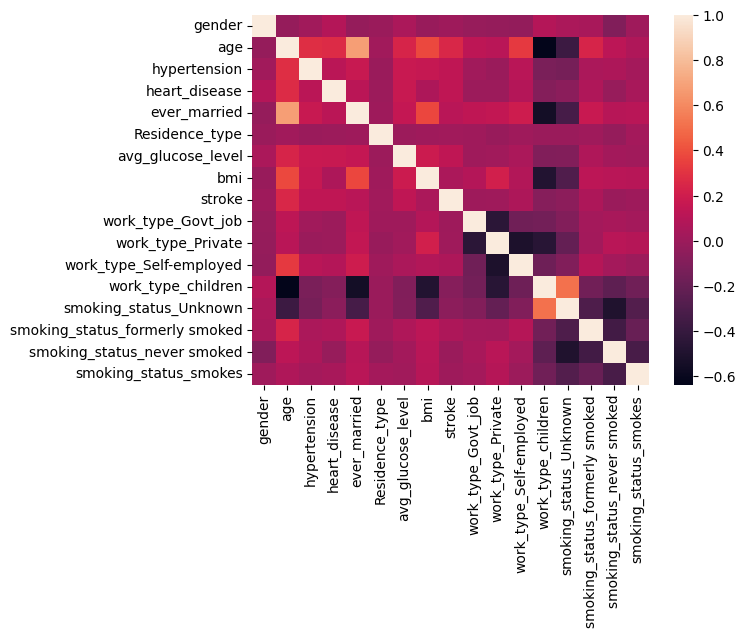

In [ ]:
import seaborn as sns
co = X.corr()
sns.heatmap(co)

Comparison of the number of instances of our unique classes

Count of "yes": 248
Count of "no": 4733


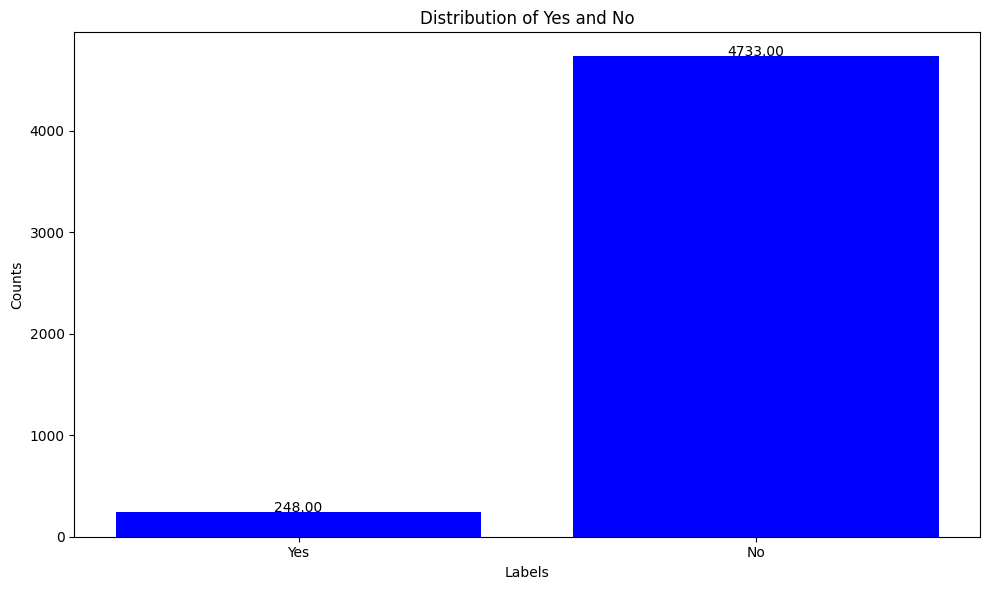

In [ ]:

yes_count = X['stroke'].eq(1).sum()
no_count = X['stroke'].eq(0).sum()

print(f'Count of "yes": {yes_count}')
print(f'Count of "no": {no_count}')

import matplotlib.pyplot as plt

labels = ["Yes","No"]
counts = [yes_count, no_count]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(labels, counts, color='blue')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Yes and No')

# Display the accuracy values on top of the bars
for i, value in enumerate(counts):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()

Creating the Output Data

In [ ]:
Y = pd.DataFrame(X['stroke'])
Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
4976,0
4977,0
4978,0
4979,0


Removing the Output Column from our Features

In [ ]:
X.drop('stroke', axis = 1, inplace = True)
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,0,1,0,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,0,1,0,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,0,70.15,29.8,0,1,0,0,0,1,0,0
4977,1,40.0,0,0,1,1,191.15,31.1,0,1,0,0,0,0,0,1
4978,0,45.0,1,0,1,0,95.02,31.8,1,0,0,0,0,0,0,1
4979,1,40.0,0,0,1,0,83.94,30.0,0,1,0,0,0,0,0,1


Splitting our Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.30)

Scaling our Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled

In [ ]:
# stroke["gender"].unique()
# stroke["hypertension"].unique()
# stroke['heart_disease'].unique()
# stroke['ever_married'].unique()
# stroke['Residence_type'].unique()
# stroke['work_type'].unique()
# stroke['smoking_status'].unique()

K - Nearest Neighbours (KNN) Model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.95





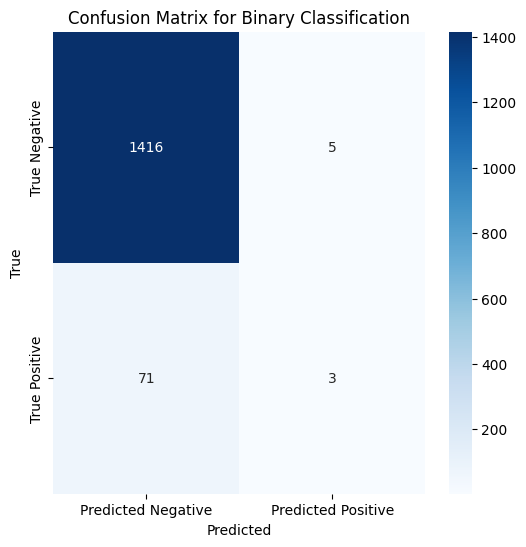

Precision: 0.375
Recall: 0.04054054054054054


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = knn.score(X_test, y_test)
print("KNN Accuracy: {:.2f}".format(knn_accuracy))
print("\n\n")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)

print("Precision:", precision)
print("Recall:", recall)

Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.9505016722408027





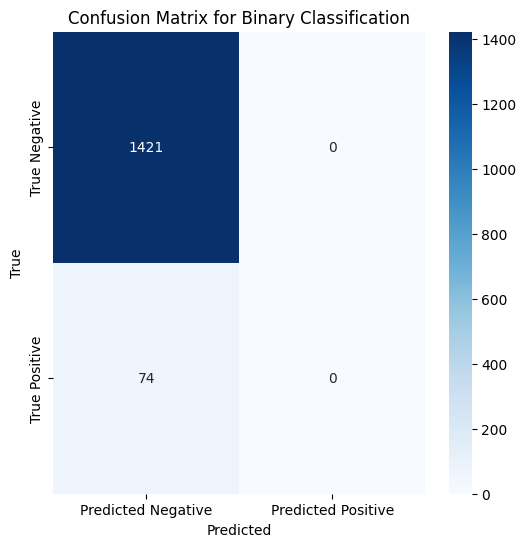

Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print( "Logistic Regression Accuracy:", logistic_regression_accuracy)

# print("Similarity between KNN and Logistic Regression:")
# print(accuracy_score(knn_predictions , predictions))
print("\n\n")

cm = confusion_matrix(y_test, logistic_regression_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, logistic_regression_predictions)
recall = recall_score(y_test, logistic_regression_predictions)

print("Precision:", precision)
print("Recall:", recall)

Decision Tree Model

Decision Tree Accuracy: 0.9170568561872909


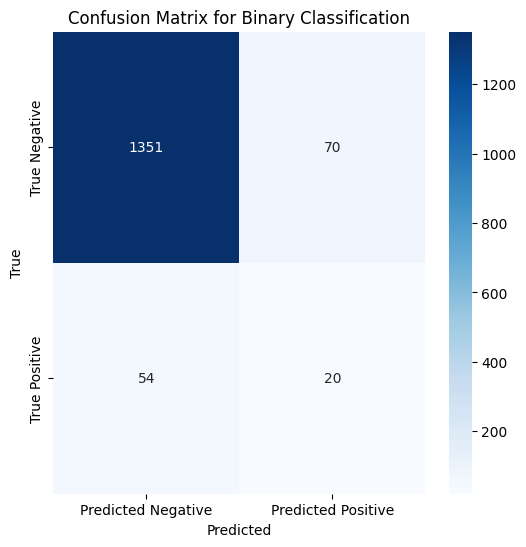

Precision: 0.2222222222222222
Recall: 0.2702702702702703


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

decision_tree_predictions = decision_tree.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree Accuracy:", decision_tree_accuracy)

cm = confusion_matrix(y_test, decision_tree_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, decision_tree_predictions)
recall = recall_score(y_test, decision_tree_predictions)

print("Precision:", precision)
print("Recall:", recall)

Support Vector Machine Model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine Accuracy: 0.9505016722408027





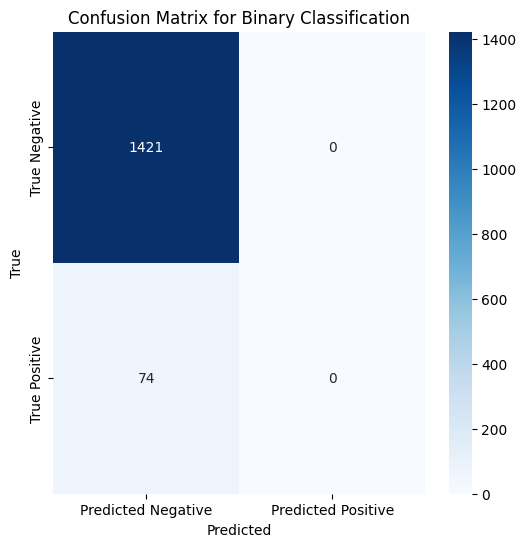

Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_predictions)
print("Support Vector Machine Accuracy:", svc_accuracy)
print("\n\n")

cm = confusion_matrix(y_test, svc_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Binary Classification")
plt.show()

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, svc_predictions)
recall = recall_score(y_test, svc_predictions)

print("Precision:", precision)
print("Recall:", recall)

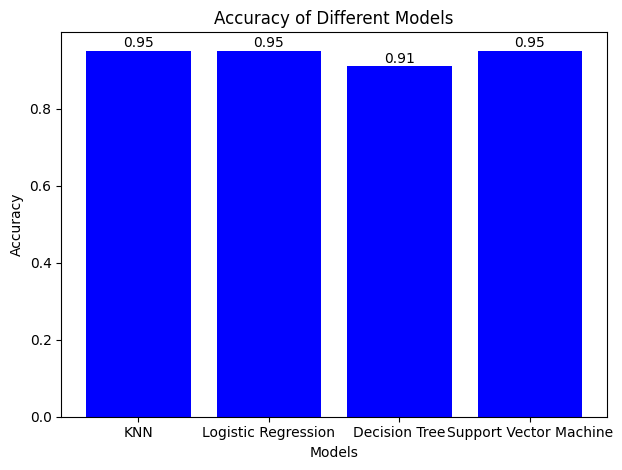

In [ ]:
model_names = ['KNN', 'Logistic Regression', 'Decision Tree', 'Support Vector Machine']
accuracy_values = [knn_accuracy , logistic_regression_accuracy, decision_tree_accuracy, svc_accuracy]

plt.bar(model_names, accuracy_values, color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Display the accuracy values on top of the bars
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()
